In [1]:
from sklearn import datasets
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\results')
df = pd.read_csv('features_from_Matrix.csv')
df.shape

(69, 135)

# 1 Build Random Forest Model With All Features

In [2]:
from sklearn.model_selection import train_test_split
X=df # Features
X = X.drop('spike',axis=1)
y=df['spike']  # Labels

In [3]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0,n_estimators=1000)
forest.fit(X, y)

RandomForestClassifier(n_estimators=1000, random_state=0)

## 1.1 Feature importance based on mean decrease in impurity
Gini Importance or Mean Decrease in Impurity (MDI)

In [5]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_

feature_imp = pd.Series(importances,index=X.columns)
feature_imp = feature_imp.sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(feature_imp)

Lag1.Brand39                                      0.042569
keywords_df3057.high                              0.032154
DiffLag3.ten_thirty_package_number.low            0.027143
no.high                                           0.027068
Roll3.other_share.low                             0.022696
Lag3.cloth.high                                   0.019315
Lag3.nonwoven_share.high                          0.018904
Lag2.no.high                                      0.018577
interval.peak.travel.low                          0.018039
Lag2.over_thirty_package_number.high              0.018017
Lag3.other_share.low                              0.017594
nonwoven.high                                     0.017553
other_share.low                                   0.017502
Roll3.yes.high                                    0.017001
keywords_df7661.high                              0.016894
Lag1.no.high                                      0.016597
Lag1.nonwoven.high                                0.0164

## 1.2 Feature importance based on feature permutation
 Permutation Importance or Mean Decrease in Accuracy (MDA)

In [8]:
from sklearn.inspection import permutation_importance
result = permutation_importance(forest, X, y, n_repeats=10, random_state=42, n_jobs=2)
forest_imp = pd.Series(result.importances_mean, index=X.columns)
forest_imp = forest_imp.sort_values(ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(forest_imp)

bigger.high                                       0.0
Lag2.interval.peak.disease.low                    0.0
Lag3.bigger.high                                  0.0
Lag3..health.and.fitness.disease.epidemic         0.0
Lag3..health.and.fitness.disease                  0.0
Lag2.zero_three_package_number.high               0.0
Lag2.yes.high                                     0.0
Lag2.urethane.high                                0.0
Lag2.ten_thirty_package_number.high               0.0
Lag2.regular.high                                 0.0
Lag2.over_thirty_package_number.high              0.0
Lag2.other_share.low                              0.0
Lag2.nonwoven_share.high                          0.0
Lag2.no_share.high                                0.0
Lag2.no.high                                      0.0
Lag2.interval.peak.travel.low                     0.0
Lag2.health.and.fitness.high                      0.0
Lag3.Brand31                                      0.0
Lag2.disease.high           

# 2 Random Forest with Selected Features
choose features with imp>0.015, and delete "Lag3.other_share.low" "Roll3.other_share.low" (because there are many similar features).

In [10]:
df2 = df.filter(['Lag1.Brand39','spike','Lag3.nonwoven_share.high'
                 'keywords_df3057.high',
                 'DiffLag3.ten_thirty_package_number.low',
                'no.high','Lag3.cloth.high','Lag3.nonwoven_share.high',
                 'Lag2.no.high','interval.peak.travel.low','Lag2.over_thirty_package_number.high',
                 'other_share.low','Roll3.yes.high','keywords_df7661.high','Lag1.no.high ','Lag1.nonwoven.high   '
                ], axis=1)
df2.shape

(69, 12)

In [14]:
# add date into dataset for making plots later 
os.chdir('C:\\Users\\alexx\\Documents\\thesis\\processed data')
df_date = pd.read_csv('Other_variables.csv')
df2['date'] = df_date['date']

## 2.1 Training and Testing Data

In [15]:
from sklearn.model_selection import train_test_split
X=df2.drop('spike',axis=1) # Features
y=df2['spike']  # Labels
    
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [16]:
X_train_with_date = X_train
X_test_with_date = X_test

X_train = X_train.drop('date',axis=1)
X_test = X_test.drop('date',axis=1)

## 2.2 Build Model

In [17]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## 2.3 Feature importance based on mean decrease in impurity
Gini Importance or Mean Decrease in Impurity (MDI)

In [18]:
# test hong long will it take to calculate features importance
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.007 seconds


In [19]:
feature_imp = pd.Series(importances,index=X_train.columns)
feature_imp = feature_imp.sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(feature_imp)

Lag3.cloth.high                           0.138394
DiffLag3.ten_thirty_package_number.low    0.137795
Lag1.Brand39                              0.130804
Lag3.nonwoven_share.high                  0.104953
Roll3.yes.high                            0.101788
no.high                                   0.080052
other_share.low                           0.070677
interval.peak.travel.low                  0.070122
Lag2.over_thirty_package_number.high      0.066265
Lag2.no.high                              0.050615
keywords_df7661.high                      0.048536
dtype: float64


## 2.4 Plot Importance

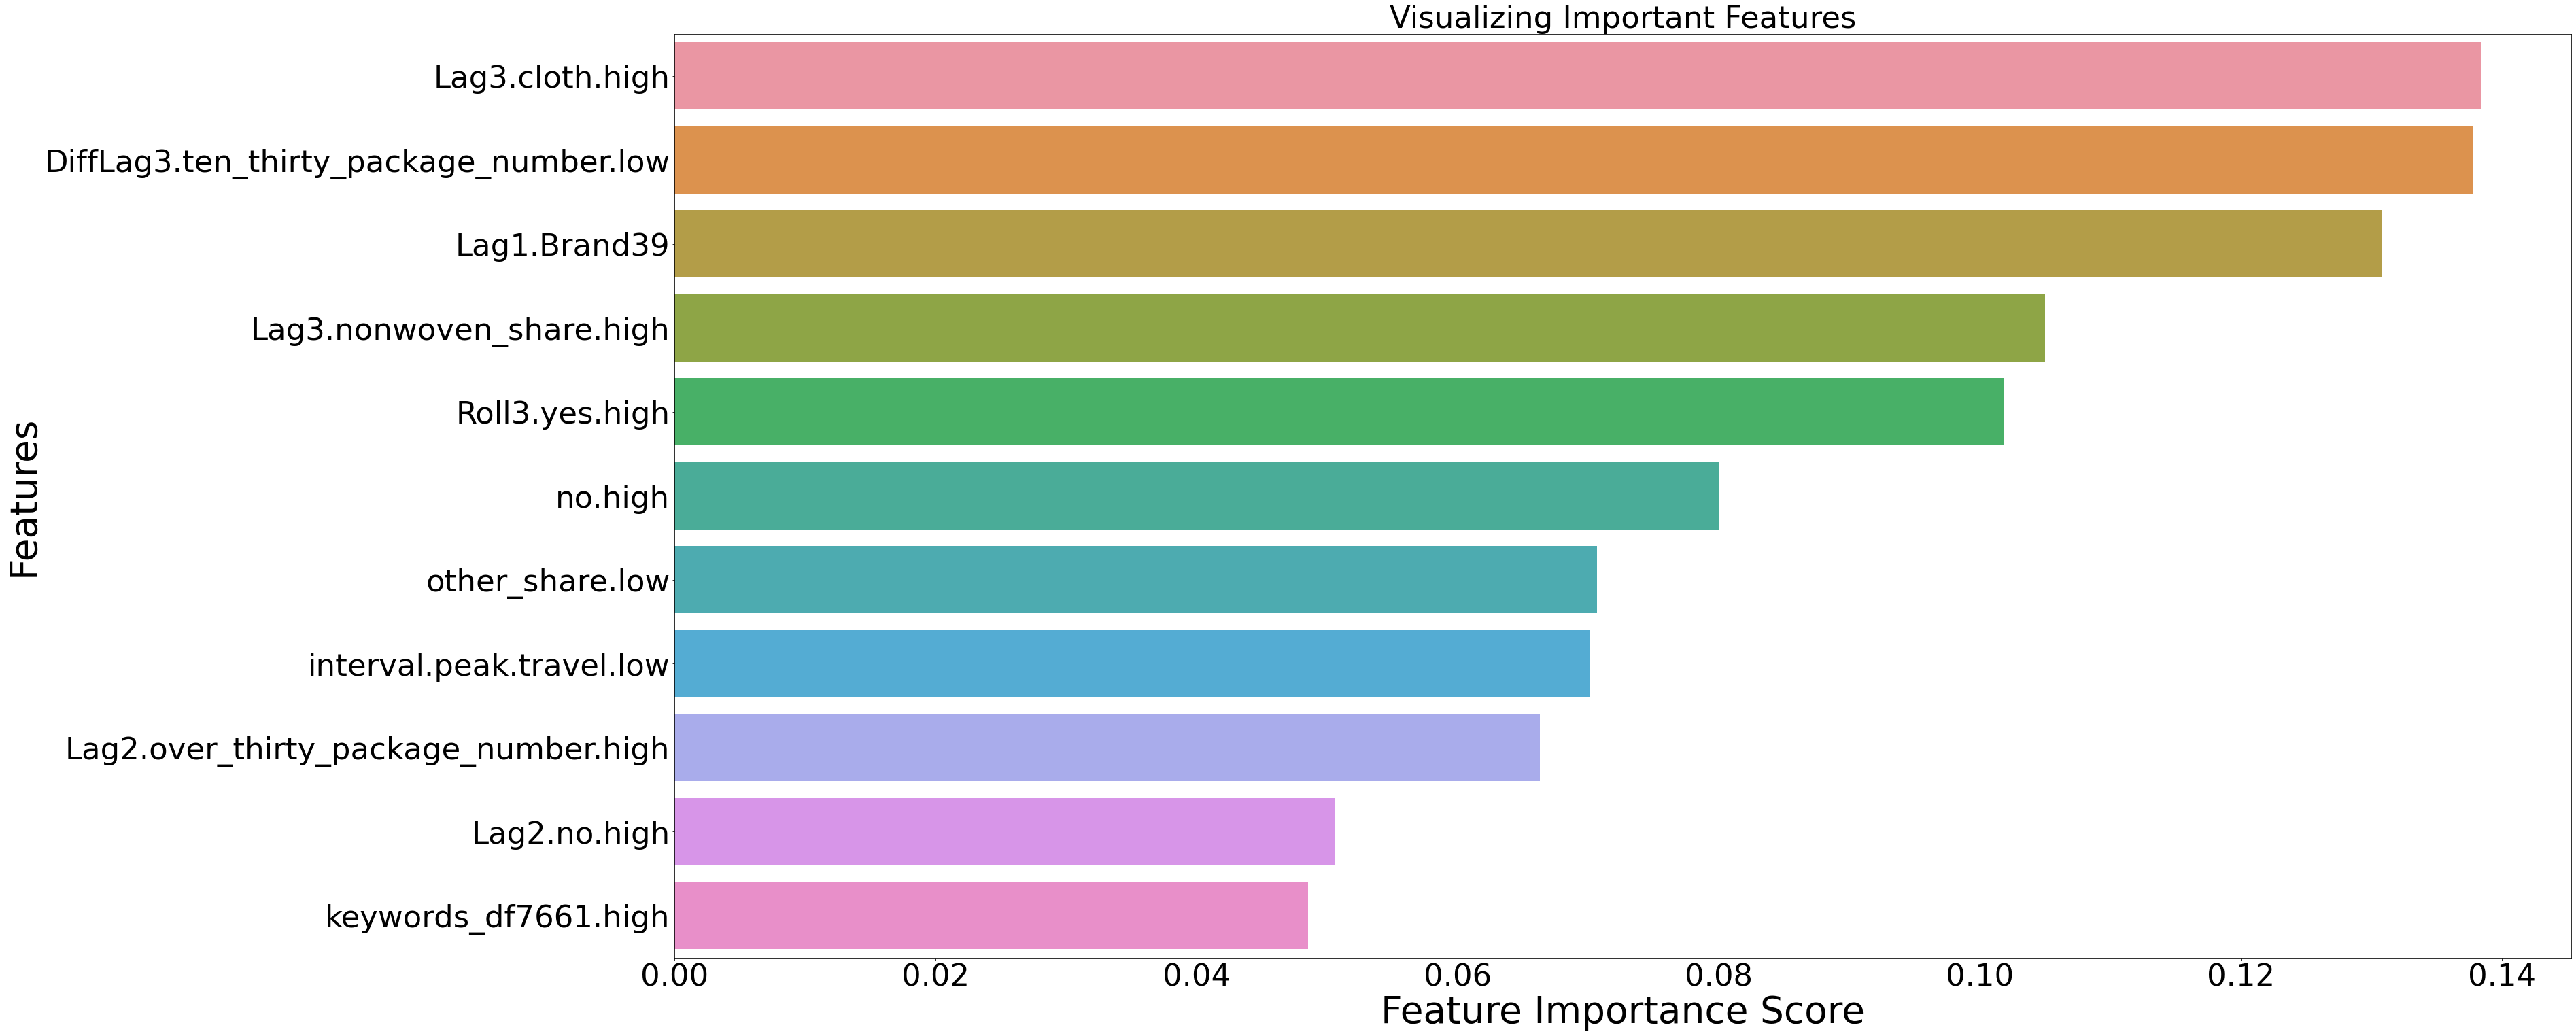

In [20]:
import seaborn as sns

%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(50, 25))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', size=55)
plt.ylabel('Features', size=55)
plt.title("Visualizing Important Features", size=45)

plt.xticks(fontsize=45)
plt.yticks(fontsize=45)


plt.show()

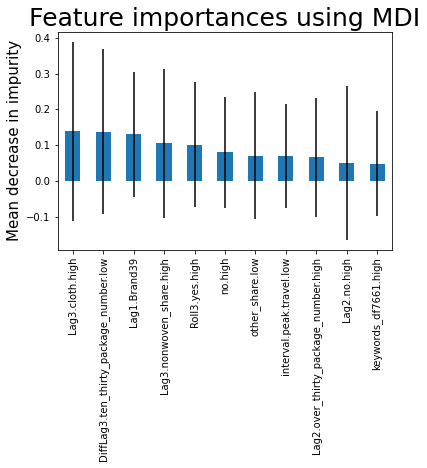

In [21]:
fig, ax = plt.subplots()
feature_imp.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI", size=25)
ax.set_ylabel("Mean decrease in impurity", size=15)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## 2.5 Plot Validation Result

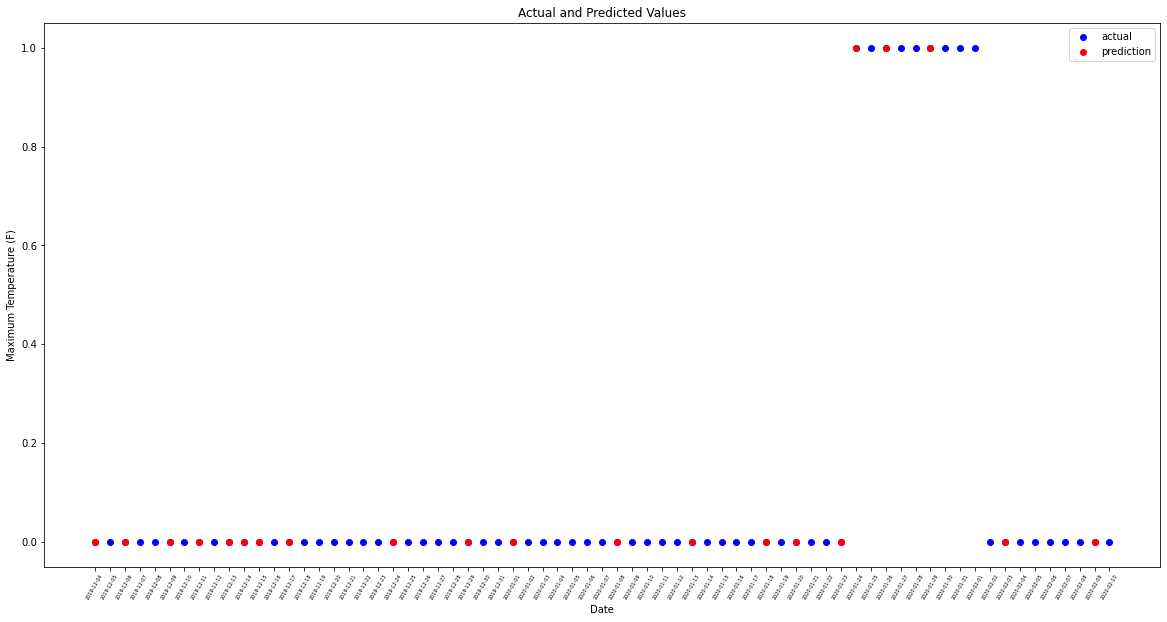

In [22]:
# Use datetime for creating date objects for plotting
import datetime

y_pred=forest.predict(X_test)


# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'prediction': y_pred})
# Plot the actual values
plt.figure(figsize=(20, 10))
plt.plot(df_date['date'], df['spike'], 'bo', label = 'actual')
# Plot the predicted values
plt.plot(X_test_with_date['date'],predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60', size=5); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

## 2.6 Confusion Matrix, Accuracy, ROC, and AUC

In [23]:
# out-of-sample
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[18,  0],
       [ 0,  3]], dtype=int64)

In [24]:
#in-sample
from sklearn.metrics import confusion_matrix
y_predin=forest.predict(X_train)
confusion_matrix(y_train, y_predin)

array([[42,  0],
       [ 0,  6]], dtype=int64)

In [25]:
# calculate out-of-sample accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [28]:
# calculate in-sample accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, y_predin))

Accuracy: 1.0


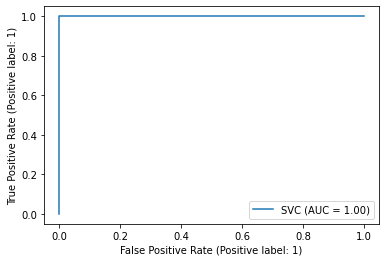

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

# SVC - Support Vector Classification

svc = SVC(random_state=42)
svc.fit(X_train, y_train)

svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

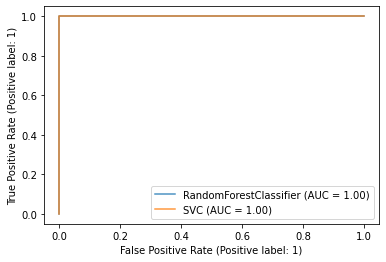

In [30]:
forest.fit(X_train, y_train)
ax = plt.gca()
forest_disp = plot_roc_curve(forest, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()